# Generation

In [99]:
from openai import OpenAI
client = OpenAI()

completion = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": "You are a helpful assistant, skilled in writing teacher's evaluations."},
    {"role": "user", "content": "Write a short teacher's evaluation for Mary Woods, a female instructor teaching Biology at a university, from a student perspective"}
  ]
)

print(completion.choices[0].message.content)

Subject: Evaluation for Instructor Mary Woods

Professor Mary Woods exemplifies what it means to be a superb educator. Her unmistakable enthusiasm for biology is contagious and creates a highly stimulating learning atmosphere. From her deep knowledge of the subject matter to her ability to connect complex biological processes to real-world analogies, she keeps class lectures engaging and comprehensible for students of different proficiency levels.

The approachability that Mrs. Woods possesses is commendable. She fosters a classroom environment where students feel comfortable asking questions and engaging in discussions. She ensures that each student's queries are met with patience and a satisfactory explanation. These interactions have significantly enhanced my understanding and appreciation of biology, and I believe my peers share this sentiment.

Despite her evident expertise, Prof. Woods continuously exhibits humility, encouraging feedback to improve her teaching methodologies. The

In [100]:
import pandas as pd
from openai import OpenAI

# Assuming your OpenAI API key is set in your environment variables,
# otherwise you can set it manually with openai.api_key = 'your_api_key_here'

def generate_teacher_evaluation(teacher_name, gender, subject, repetitions=10):
    """
    Generates teacher evaluations for given parameters and repeats the process a specified number of times.

    Args:
    - teacher_name (str): The name of the teacher.
    - gender (str): The gender of the teacher.
    - subject (str): The subject the teacher teaches.
    - repetitions (int): How many evaluations to generate for the given parameters.

    Returns:
    - DataFrame containing the input parameters and the generated evaluations.
    """
    evaluations = []
    client = OpenAI()

    for _ in range(repetitions):
        prompt = f"Write a short teacher's evaluation for {teacher_name}, a {gender} instructor teaching {subject} at a university, from a student perspective."
        completion = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are a helpful assistant, skilled in writing teacher's evaluations."},
                {"role": "user", "content": prompt}
            ]
        )
        evaluation_text = completion.choices[0].message.content
        evaluations.append([teacher_name, gender, subject, evaluation_text])
        
    return pd.DataFrame(evaluations, columns=['Teacher Name', 'Gender', 'Subject', 'Evaluation'])

# Example usage:
# Define the parameters for which you want to generate evaluations
teachers_info = [
    ("Mary Woods", "female", "Foreign Languages and Literatures"),
    ("Mary Woods", "female", "Psychology"),
    ("Mary Woods", "female", "Education"),
    ("Mary Woods", "female", "Computer and Information Sciences"),
    ("Mary Woods", "female", "Engineering"),
    ("Mary Woods", "female", "Economics"),
    ("John Woods", "male", "Foreign Languages and Literatures"),
    ("John Woods", "male", "Psychology"),
    ("John Woods", "male", "Education"),
    ("John Woods", "male", "Computer and Information Sciences"),
    ("John Woods", "male", "Engineering"),
    ("John Woods", "male", "Economics"),
]

# Generate evaluations for each teacher and concatenate into a single DataFrame
all_evaluations = pd.concat([generate_teacher_evaluation(name, gender, subject, 60) for name, gender, subject in teachers_info], ignore_index=True)

# Example to save the DataFrame to a CSV file
all_evaluations.to_csv("teacher_evaluations_60.csv", index=False)


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

# Lexical Content Analysis

## Classify nouns and adjectives in different scenarios

In [68]:
import pandas as pd
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load your CSV file
df = pd.read_csv("teacher_evaluations.csv")  # Adjust the path to your CSV file

# Initialize a dictionary for storing nouns and adjectives. Keys will be added dynamically.
word_dicts = {}

# Function to process each evaluation and categorize words
def process_evaluation(row):
    instructor_gender = "Female" if row['Gender'] == "female" else "Male"
    subject_cleaned = row['Subject'].replace(" ", "_").replace("and", "&")  # Clean subject for better key readability
    key_nouns = f"{instructor_gender}_Instructor_{subject_cleaned}_Nouns"
    key_adjectives = f"{instructor_gender}_Instructor_{subject_cleaned}_Adjectives"
    
    # Check if keys exist in the dictionary, if not, initialize them
    if key_nouns not in word_dicts:
        word_dicts[key_nouns] = []
    if key_adjectives not in word_dicts:
        word_dicts[key_adjectives] = []
    
    # Process the evaluation text
    doc = nlp(row['Evaluation'])
    for token in doc:
        if token.pos_ == "NOUN":
            lemma = token.lemma_.lower()
            word_dicts[key_nouns].append(lemma)
        elif token.pos_ == "ADJ":
            lemma = token.lemma_.lower()
            word_dicts[key_adjectives].append(lemma)

# Apply the function to each row in the DataFrame
df.apply(process_evaluation, axis=1)

# At this point, word_dicts will have all the nouns and adjectives categorized


0      None
1      None
2      None
3      None
4      None
       ... 
355    None
356    None
357    None
358    None
359    None
Length: 360, dtype: object

In [69]:
word_dicts

{'Female_Instructor_Foreign_Languages_&_Literatures_Nouns': ['subject',
  'evaluation',
  'course',
  'course',
  'semester',
  'dedication',
  'knowledge',
  'passion',
  'field',
  'professor',
  'ability',
  'subject',
  'knowledge',
  'bound',
  'curriculum',
  'knowledge',
  'acquisition',
  'context',
  'insight',
  'culture',
  'history',
  'nuance',
  'language',
  'instruction',
  'style',
  'class',
  'activity',
  'fun',
  'learning',
  'environment',
  'connection',
  'nuance',
  'meaning',
  'culture',
  'student',
  'teacher',
  'relationship',
  'approachability',
  'patience',
  'office',
  'hour',
  'commitment',
  'success',
  'feedback',
  'improvement',
  'language',
  'proficiency',
  'course',
  'guidance',
  'enthusiasm',
  'skill',
  'experience',
  'teaching',
  'methodology',
  'passion',
  'subject',
  'interest',
  'essence',
  'language',
  'literature',
  'recommendation',
  'class',
  'skill',
  'knowledge',
  'course',
  'instruction',
  'teacher',
  'ev

## Count occurances of words

In [70]:
from collections import defaultdict

# Assuming `word_dicts` is your updated dictionary with lemmatized words
# Initialize new dictionaries to store word counts separately for nouns and adjectives
noun_count_dicts = {key: defaultdict(int) for key in word_dicts.keys() if 'Nouns' in key}
adj_count_dicts = {key: defaultdict(int) for key in word_dicts.keys() if 'Adjectives' in key}

# Function to convert lists of words into count dictionaries
def list_to_count_dict(word_list, count_dict):
    for words in word_list:
        for word in words:
            count_dict[word] += 1

# Populate the count dictionaries for nouns and adjectives
for key, words in word_dicts.items():
    if 'Nouns' in key:
        list_to_count_dict([words], noun_count_dicts[key])
    elif 'Adjectives' in key:
        list_to_count_dict([words], adj_count_dicts[key])


In [117]:
noun_count_dicts.keys()

dict_keys(['Female_Instructor_Foreign_Languages_&_Literatures_Nouns', 'Female_Instructor_Psychology_Nouns', 'Female_Instructor_Education_Nouns', 'Female_Instructor_Computer_&_Information_Sciences_Nouns', 'Female_Instructor_Engineering_Nouns', 'Female_Instructor_Economics_Nouns', 'Male_Instructor_Foreign_Languages_&_Literatures_Nouns', 'Male_Instructor_Psychology_Nouns', 'Male_Instructor_Education_Nouns', 'Male_Instructor_Computer_&_Information_Sciences_Nouns', 'Male_Instructor_Engineering_Nouns', 'Male_Instructor_Economics_Nouns'])

## Calculate Odds Ratio

In [135]:
def calculate_odds_ratio(a, b, c, d):
    """
    Calculate odds ratio.

    Args:
    - a (int): Count of word in first group.
    - b (int): Count of word in second group.
    - c (int): Count of all other words in first group.
    - d (int): Count of all other words in second group.

    Returns:
    - float: Odds ratio.
    """
    # Avoid division by zero by adding a small value (e.g., 1e-10)
    ratio = (max(a, 1e-10) / max(c, 1e-10)) / (max(b, 1e-10) / max(d, 1e-10))
    return ratio

def calculate_all_odds_ratios(word_count_dict, group_a_key, group_b_key, min_freq=3, or_range=(0.1, 10)):
    odds_ratios = {}
    words_set = set(word_count_dict[group_a_key].keys()) | set(word_count_dict[group_b_key].keys())

    for word in words_set:
        total_freq = word_count_dict[group_a_key].get(word, 0) + word_count_dict[group_b_key].get(word, 0)
        if total_freq < min_freq:
            continue  # Skip words that don't meet the minimum frequency threshold
        
        a = word_count_dict[group_a_key].get(word, 0)
        b = word_count_dict[group_b_key].get(word, 0)
        c = sum(word_count_dict[group_a_key].values()) - a
        d = sum(word_count_dict[group_b_key].values()) - b
        
        odds_ratio = calculate_odds_ratio(a, b, c, d)
        if or_range[0] <= odds_ratio <= or_range[1]:  # Apply the OR range filter
            odds_ratios[word] = odds_ratio

    return odds_ratios



In [128]:
def compute_odds_ratios_for_all_groups(noun_dicts, adj_dicts, min_freq=3, or_range=(0.1, 10)):
    odds_ratios_results = {}
    
    # Extract subjects more robustly
    subjects = set("_".join(key.split('_')[2:-1]) for key in noun_dicts.keys())
    
    for subject in subjects:
        for gender_pair in [("Male", "Female")]:  # Adjust based on your data
            male_key_noun = f"{gender_pair[0]}_Instructor_{subject}_Nouns"
            female_key_noun = f"{gender_pair[1]}_Instructor_{subject}_Nouns"
            male_key_adj = f"{gender_pair[0]}_Instructor_{subject}_Adjectives"
            female_key_adj = f"{gender_pair[1]}_Instructor_{subject}_Adjectives"

            # Ensure the keys exist in dictionaries before calculating
            if male_key_noun in noun_dicts and female_key_noun in noun_dicts:
                key_noun = f"{gender_pair[0]}_vs_{gender_pair[1]}_{subject}_Nouns"
                odds_ratios_results[key_noun] = calculate_all_odds_ratios(noun_dicts, male_key_noun, female_key_noun, min_freq, or_range)

            if male_key_adj in adj_dicts and female_key_adj in adj_dicts:
                key_adj = f"{gender_pair[0]}_vs_{gender_pair[1]}_{subject}_Adjectives"
                odds_ratios_results[key_adj] = calculate_all_odds_ratios(adj_dicts, male_key_adj, female_key_adj, min_freq, or_range)

    return odds_ratios_results

In [129]:
# Compute the odds ratios for all groups
odds_ratios_results = compute_odds_ratios_for_all_groups(noun_count_dicts, adj_count_dicts, 3, (0.1, 10))

In [136]:
odds_ratios_results_filter = compute_odds_ratios_for_all_groups(noun_count_dicts, adj_count_dicts, 3, (0.1, 10))

In [130]:
odds_ratios_results.keys()

dict_keys(['Male_vs_Female_Education_Nouns', 'Male_vs_Female_Education_Adjectives', 'Male_vs_Female_Computer_&_Information_Sciences_Nouns', 'Male_vs_Female_Computer_&_Information_Sciences_Adjectives', 'Male_vs_Female_Psychology_Nouns', 'Male_vs_Female_Psychology_Adjectives', 'Male_vs_Female_Economics_Nouns', 'Male_vs_Female_Economics_Adjectives', 'Male_vs_Female_Engineering_Nouns', 'Male_vs_Female_Engineering_Adjectives', 'Male_vs_Female_Foreign_Languages_&_Literatures_Nouns', 'Male_vs_Female_Foreign_Languages_&_Literatures_Adjectives'])

In [75]:
def top_or_words(odds_ratios, n=10):
    """
    Identify the top n largest and smallest odds ratios.

    Args:
    - odds_ratios (dict): Dictionary with words as keys and odds ratios as values.
    - n (int): Number of top values to return.

    Returns:
    - tuple: Two dictionaries containing the top n largest and smallest ORs, respectively.
    """
    # Sort words by their ORs in ascending order and select the top n smallest
    smallest_or = dict(sorted(odds_ratios.items(), key=lambda item: item[1])[:n])
    # Sort words by their ORs in descending order and select the top n largest
    largest_or = dict(sorted(odds_ratios.items(), key=lambda item: item[1], reverse=True)[:n])
    
    return largest_or, smallest_or


In [80]:
# Function to identify and print the most salient words for each pair
def identify_and_print_salient_words(odds_ratios_results):
    salient_words_results = {}
    
    for key, odds_ratios in odds_ratios_results.items():
        largest_or, smallest_or = top_or_words(odds_ratios, n=10)
        
        # Store the results
        salient_words_results[key] = {"largest_or": largest_or, "smallest_or": smallest_or}
        
        # Print the results for inspection
        print(f"=== {key} ===")
        print("Top 10 words with largest odds ratios:")
        for word, or_value in largest_or.items():
            print(f"{word}: {or_value:.4f}")
        
        print("\nTop 10 words with smallest odds ratios:")
        for word, or_value in smallest_or.items():
            print(f"{word}: {or_value:.4f}")
        
        print("\n")
    
    return salient_words_results


In [131]:
# Use the function to identify, print, and store the most salient words
salient_words_results = identify_and_print_salient_words(odds_ratios_results)

=== Male_vs_Female_Education_Nouns ===
Top 10 words with largest odds ratios:
work: 50654524758.1104
gap: 30358158044.3434
setting: 30358158044.3434
session: 30358158044.3434
integration: 30358158044.3434
empathy: 30358158044.3434
demeanor: 8.1140
contribution: 6.0786
strategy: 6.0786
aspect: 6.0786

Top 10 words with smallest odds ratios:
case: 0.0000
group: 0.0000
inclusive: 0.0000
availability: 0.0000
study: 0.1258
issue: 0.1679
support: 0.2016
excellence: 0.2016
instruction: 0.2521
variety: 0.2521


=== Male_vs_Female_Education_Adjectives ===
Top 10 words with largest odds ratios:
simple: 50642673521.8509
competent: 50642673521.8509
adept: 30307692307.6923
notable: 30307692307.6923
responsive: 30307692307.6923
fair: 5.0578
contagious: 4.0411
beneficial: 3.0426
subject: 3.0426
provoking: 3.0269

Top 10 words with smallest odds ratios:
well: 0.0000
extraordinary: 0.0000
rich: 0.0000
healthy: 0.0000
meaningful: 0.0000
welcoming: 0.0000
stimulating: 0.0000
dynamic: 0.1107
overall: 0.16

In [137]:
salient_words_results_filter = identify_and_print_salient_words(odds_ratios_results_filter)

=== Male_vs_Female_Education_Nouns ===
Top 10 words with largest odds ratios:
demeanor: 8.1140
contribution: 6.0786
strategy: 6.0786
aspect: 6.0786
professionalism: 5.0626
pacing: 4.0478
breadth: 4.0478
theory: 3.3946
topic: 3.0411
use: 3.0411

Top 10 words with smallest odds ratios:
study: 0.1258
issue: 0.1679
support: 0.2016
excellence: 0.2016
instruction: 0.2521
variety: 0.2521
testament: 0.2521
opportunity: 0.2521
progress: 0.3360
context: 0.3364


=== Male_vs_Female_Education_Adjectives ===
Top 10 words with largest odds ratios:
fair: 5.0578
contagious: 4.0411
beneficial: 3.0426
subject: 3.0426
provoking: 3.0269
continuous: 3.0269
instrumental: 3.0269
safe: 3.0269
visual: 3.0269
complicated: 3.0269

Top 10 words with smallest odds ratios:
dynamic: 0.1107
overall: 0.1667
grateful: 0.2003
insightful: 0.3338
rewarding: 0.3338
tangible: 0.3346
quick: 0.3346
interpersonal: 0.3346
own: 0.3346
active: 0.4540


=== Male_vs_Female_Computer_&_Information_Sciences_Nouns ===
Top 10 words with

## TF_IDF

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to reconstruct texts from count dictionaries
def reconstruct_texts_from_counts(count_dicts):
    reconstructed_texts = {}
    for key, counts in count_dicts.items():
        text = ' '.join([' '.join([word] * count) for word, count in counts.items()])
        reconstructed_texts[key] = text
    return reconstructed_texts

# Reconstruct texts for nouns and adjectives
reconstructed_noun_texts = reconstruct_texts_from_counts(noun_count_dicts)
reconstructed_adj_texts = reconstruct_texts_from_counts(adj_count_dicts)

# Initialize TfidfVectorizer
vectorizer_nouns = TfidfVectorizer()
vectorizer_adjectives = TfidfVectorizer()

# Combine all texts into lists for vectorization
all_noun_texts = list(reconstructed_noun_texts.values())
all_adj_texts = list(reconstructed_adj_texts.values())
labels_nouns = list(reconstructed_noun_texts.keys())
labels_adjectives = list(reconstructed_adj_texts.keys())

# Compute TF-IDF matrices
tfidf_matrix_nouns = vectorizer_nouns.fit_transform(all_noun_texts)
tfidf_matrix_adjectives = vectorizer_adjectives.fit_transform(all_adj_texts)

# Example function to display top n TF-IDF scores for a given matrix
def display_top_n_tfidf_scores(tfidf_matrix, feature_names, labels, top_n=10):
    for i, label in enumerate(labels):
        print(f"Category: {label}")
        dense = tfidf_matrix[i].todense().tolist()[0]
        scores = [(feature_names[idx], score) for idx, score in enumerate(dense) if score > 0]
        sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
        for term, score in sorted_scores[:top_n]:
            print(f"{term}: {score:.4f}")
        print("\n")

# Display top TF-IDF scores for nouns and adjectives
print("Top Nouns by TF-IDF Scores:")
display_top_n_tfidf_scores(tfidf_matrix_nouns, vectorizer_nouns.get_feature_names_out(), labels_nouns, top_n=10)

print("Top Adjectives by TF-IDF Scores:")
display_top_n_tfidf_scores(tfidf_matrix_adjectives, vectorizer_adjectives.get_feature_names_out(), labels_adjectives, top_n=10)


Top Nouns by TF-IDF Scores:
Category: Female_Instructor_Foreign_Languages_&_Literatures_Nouns
language: 0.5385
student: 0.5204
class: 0.2074
teaching: 0.2074
culture: 0.1837
literature: 0.1834
learning: 0.1487
environment: 0.1330
subject: 0.1252
knowledge: 0.1096


Category: Female_Instructor_Psychology_Nouns
psychology: 0.7027
student: 0.4662
class: 0.1813
subject: 0.1684
teaching: 0.1392
learning: 0.1360
knowledge: 0.1101
understanding: 0.1101
instructor: 0.0971
concept: 0.0939


Category: Female_Instructor_Education_Nouns
student: 0.6414
teaching: 0.2521
subject: 0.2035
learning: 0.1991
class: 0.1769
knowledge: 0.1504
passion: 0.1504
environment: 0.1460
understanding: 0.1416
educator: 0.1371


Category: Female_Instructor_Computer_&_Information_Sciences_Nouns
student: 0.6136
teaching: 0.2437
class: 0.2166
subject: 0.2030
learning: 0.1985
computer: 0.1669
concept: 0.1579
knowledge: 0.1489
instructor: 0.1399
lecture: 0.1263


Category: Female_Instructor_Engineering_Nouns
engineering: 0

## WEAT

In [111]:
import numpy as np
from scipy import spatial

def load_glove_embeddings(path):
    """
    Load GloVe embeddings from a file.

    Args:
    - path (str): The path to the GloVe embeddings file.

    Returns:
    - dict: A dictionary mapping words to their GloVe vector representation.
    """
    glove_embeddings = {}
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            try:
                vector = np.asarray(values[1:], dtype=np.float32)
                glove_embeddings[word] = vector
            except ValueError:
                # Skip lines that cannot be properly parsed
                print(f"Skipping line: {line[:50]}...")  # Print the first 50 characters of the problematic line
                continue
    return glove_embeddings

# Update the path to where the GloVe file is located on your machine
glove_path = 'glove.840B.300d.txt'

# Attempt to load the GloVe embeddings again
try:
    word_vectors = load_glove_embeddings(glove_path)
    print("GloVe embeddings loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")


Skipping line: . . . -0.1573 -0.29517 0.30453 -0.54773 0.098293 -...
Skipping line: at name@domain.com 0.0061218 0.39595 -0.22079 0.78...
Skipping line: . . . . . -0.23773 -0.82788 0.82326 -0.91878 0.358...
Skipping line: to name@domain.com 0.33865 0.12698 -0.16885 0.5547...
Skipping line: . . 0.035974 -0.024421 0.71402 -0.61127 0.012771 -...
Skipping line: . . . . 0.033459 -0.085658 0.27155 -0.56132 0.6041...
Skipping line: email name@domain.com 0.33529 0.32949 0.2646 0.642...
Skipping line: or name@domain.com 0.48374 0.49669 -0.25089 0.9038...
Skipping line: contact name@domain.com 0.016426 0.13728 0.18781 0...
Skipping line: Email name@domain.com 0.37344 0.024573 -0.12583 0....
Skipping line: on name@domain.com 0.037295 -0.15381 -0.045189 1.0...
Skipping line: At Killerseats.com -0.13854 -0.01706 -0.13651 0.12...
Skipping line: by name@domain.com 0.6882 -0.36436 0.62079 1.1482 ...
Skipping line: in mylot.com -0.18148 0.47096 0.32916 0.044196 -0....
Skipping line: emailing name@domai

In [112]:
male_names = ['john', 'paul', 'mike', 'kevin', 'steve', 'greg', 'jeff', 'bill']
female_names = ['amy', 'joan', 'lisa', 'sarah', 'diana', 'kate', 'ann', 'donna']
career_words = ['executive', 'management', 'professional', 'corporation','salary', 'office', 'business', 'career']
family_words = ['home', 'parents', 'children', 'family', 'cousins', 'marriage','wedding', 'relatives']

In [133]:
salient_words_results.keys()

dict_keys(['Male_vs_Female_Education_Nouns', 'Male_vs_Female_Education_Adjectives', 'Male_vs_Female_Computer_&_Information_Sciences_Nouns', 'Male_vs_Female_Computer_&_Information_Sciences_Adjectives', 'Male_vs_Female_Psychology_Nouns', 'Male_vs_Female_Psychology_Adjectives', 'Male_vs_Female_Economics_Nouns', 'Male_vs_Female_Economics_Adjectives', 'Male_vs_Female_Engineering_Nouns', 'Male_vs_Female_Engineering_Adjectives', 'Male_vs_Female_Foreign_Languages_&_Literatures_Nouns', 'Male_vs_Female_Foreign_Languages_&_Literatures_Adjectives'])

In [139]:
# Ensure all predefined words are in word_vectors and filter them if not
def filter_predefined_words(words, word_vectors):
    return [word for word in words if word in word_vectors]

# Filter all predefined sets
male_names_filtered = filter_predefined_words(male_names, word_vectors)
female_names_filtered = filter_predefined_words(female_names, word_vectors)
career_words_filtered = filter_predefined_words(career_words, word_vectors)
family_words_filtered = filter_predefined_words(family_words, word_vectors)

weat_scores_name = {}
weat_p_values_name = {}
weat_scores_career = {}
weat_p_values_career = {}

for subject, words in salient_words_results_filter.items():
    X = list(words['largest_or'].keys())  # Male salient 
    Y = list(words['smallest_or'].keys())  # Female salient
    
    # Filter based on availability in word_vectors
    X_filtered = filter_predefined_words(X, word_vectors)
    Y_filtered = filter_predefined_words(Y, word_vectors)
    
    # Skip subjects if filtering results in empty sets
    if len(X_filtered) == 0 or len(Y_filtered) == 0:
        print(f"Skipping {subject} due to insufficient data.")
        continue
    
    # Compute WEAT scores for Male vs. Female Names associated with Career vs. Family Words
    effect_size = weat_effect_size(X_filtered, Y_filtered, career_words_filtered, family_words_filtered, word_vectors)
    p_value = weat_p_value(X_filtered, Y_filtered, career_words_filtered, family_words_filtered, word_vectors)
    
    # Store the results
    weat_scores_career[subject] = effect_size
    weat_p_values_career[subject] = p_value

    # Compute WEAT scores for Male vs. Female Names associated with Career vs. Family Words
    effect_size = weat_effect_size(X_filtered, Y_filtered, male_names_filtered, female_names_filtered, word_vectors)
    p_value = weat_p_value(X_filtered, Y_filtered, male_names_filtered, female_names_filtered, word_vectors)
    
    # Store the results
    weat_scores_name[subject] = effect_size
    weat_p_values_name[subject] = p_value

# Output the results
for subject in weat_scores_career:
    print(f"For career & family words, {subject}: WEAT Score = {weat_scores_career[subject]:.4f}, p-value = {weat_p_values_career[subject]:.4f}")
    print(f"For male & female names, {subject}: WEAT Score = {weat_scores_name[subject]:.4f}, p-value = {weat_p_values_name[subject]:.4f}")


For career & family words, Male_vs_Female_Education_Nouns: WEAT Score = 0.2157, p-value = 0.3343
For male & female names, Male_vs_Female_Education_Nouns: WEAT Score = -0.2214, p-value = 0.6738
For career & family words, Male_vs_Female_Education_Adjectives: WEAT Score = -0.4065, p-value = 0.8056
For male & female names, Male_vs_Female_Education_Adjectives: WEAT Score = -0.2239, p-value = 0.6773
For career & family words, Male_vs_Female_Computer_&_Information_Sciences_Nouns: WEAT Score = -0.0028, p-value = 0.5041
For male & female names, Male_vs_Female_Computer_&_Information_Sciences_Nouns: WEAT Score = -0.6595, p-value = 0.9282
For career & family words, Male_vs_Female_Computer_&_Information_Sciences_Adjectives: WEAT Score = 0.1869, p-value = 0.3488
For male & female names, Male_vs_Female_Computer_&_Information_Sciences_Adjectives: WEAT Score = 1.0471, p-value = 0.0106
For career & family words, Male_vs_Female_Psychology_Nouns: WEAT Score = -0.6373, p-value = 0.9100
For male & female na

## Sentiment Analysis

In [156]:
# Separating the adjectives and nouns into two different DataFrames

# Initialize lists to store data for adjectives and nouns separately
data_adjectives = []
data_nouns = []

# Iterate over each group and each set of words to flatten the nested dictionary
for group, content in salient_words_results_filter.items():
    # Extract subject and gender orientation from the group key
    # Split by underscores and determine if it's adjectives or nouns from the last part of the group key
    parts = group.split('_')
    subject = '_'.join(parts[3:-1])  # Join back together the parts that make up the subject
    word_type = parts[-1]  # This will be 'Adjectives' or 'Nouns'
    
    # Select the appropriate data list based on word type
    current_data_list = data_adjectives if word_type == 'Adjectives' else data_nouns
    
    for or_type, words in content.items():

        if or_type == 'largest_or':
            gender = 'Male'
        else:
            gender = 'Female'

        for word, score in words.items():
         
            # Append the data to the list
            current_data_list.append({
                'Gender': gender,
                'Subject': subject,  # Subject extracted from the group
                'OR_Type': or_type,
                'Word': word,
                'OR_Score': score
            })

# Create DataFrames from the lists
df_adjectives = pd.DataFrame(data_adjectives)
df_nouns = pd.DataFrame(data_nouns)

# Display the DataFrames to verify their structure
df_adjectives.head(), df_nouns.head()


(  Gender    Subject     OR_Type        Word  OR_Score
 0   Male  Education  largest_or        fair  5.057841
 1   Male  Education  largest_or  contagious  4.041078
 2   Male  Education  largest_or  beneficial  3.042636
 3   Male  Education  largest_or     subject  3.042636
 4   Male  Education  largest_or   provoking  3.026923,
   Gender    Subject     OR_Type             Word  OR_Score
 0   Male  Education  largest_or         demeanor  8.114025
 1   Male  Education  largest_or     contribution  6.078588
 2   Male  Education  largest_or         strategy  6.078588
 3   Male  Education  largest_or           aspect  6.078588
 4   Male  Education  largest_or  professionalism  5.062607)

In [152]:
df_adjectives

,Gender,Subject,OR_Type,Word,OR_Score
0,Male,Education,largest_or,fair,5.057841
1,Male,Education,largest_or,contagious,4.041078
2,Male,Education,largest_or,beneficial,3.042636
3,Male,Education,largest_or,subject,3.042636
4,Male,Education,largest_or,provoking,3.026923
...,...,...,...,...,...
115,Female,Foreign_Languages_&_Literatures,smallest_or,global,0.252714
116,Female,Foreign_Languages_&_Literatures,smallest_or,true,0.288130
117,Female,Foreign_Languages_&_Literatures,smallest_or,enlightening,0.337354
118,Female,Foreign_Languages_&_Literatures,smallest_or,pedagogical,0.337354


In [168]:
from textblob import TextBlob
import pandas as pd

# Function to get sentiment polarity of a word using TextBlob
def get_word_sentiment(word):
    return TextBlob(word).sentiment.polarity

# Add a new column to the DataFrame with sentiment scores
df_adjectives['Sentiment'] = df_adjectives['Word'].apply(get_word_sentiment)

# Now you can aggregate these sentiment scores by Gender, Subject, or both to see overall trends
gender_subject_sentiment = df_adjectives.groupby(['Subject', 'Gender'])['Sentiment'].mean().unstack()

# Print out the aggregated sentiment scores by subject and gender
print(gender_subject_sentiment)

# To save the results to a CSV file
gender_subject_sentiment.to_csv('gender_subject_sentiment.csv')
df_adjectives.to_csv('sentiment.csv')


Gender                             Female      Male
Subject                                            
Computer_&_Information_Sciences  0.227500  0.128636
Economics                        0.262500  0.217500
Education                        0.130000  0.053333
Engineering                      0.260303  0.130000
Foreign_Languages_&_Literatures  0.188333  0.202083
Psychology                       0.235000  0.107667


In [159]:
gender_subject_sentiment


Gender,Female,Male
Subject,,
Computer_&_Information_Sciences,0.227500,0.128636
Economics,0.262500,0.217500
Education,0.130000,0.053333
Engineering,0.260303,0.130000
Foreign_Languages_&_Literatures,0.188333,0.202083
Psychology,0.235000,0.107667


In [165]:
from scipy.stats import shapiro
from scipy.stats import ttest_ind

female_values = gender_subject_sentiment['Female'].values
male_values = gender_subject_sentiment['Male'].values

print("Shapiro-Wilk Test for Female: ", shapiro(female_values))
print("Shapiro-Wilk Test for Male: ", shapiro(male_values))

# Perform the t-test for independent samples
t_stat, p_value = ttest_ind(gender_subject_sentiment['Female'], gender_subject_sentiment['Male'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# If the p-value is less than 0.05, we can conclude there is a significant difference
# between the sentiment scores for males and females across subjects
if p_value < 0.05:
    print("There is a significant difference between the sentiment scores for males and females.")
else:
    print("There is no significant difference between the sentiment scores for males and females.")

Shapiro-Wilk Test for Female:  ShapiroResult(statistic=0.8808451723423815, pvalue=0.27296085964715444)
Shapiro-Wilk Test for Male:  ShapiroResult(statistic=0.936986479596309, pvalue=0.635024152478117)
T-statistic: 2.391886790481461, P-value: 0.03783646613979863
There is a significant difference between the sentiment scores for males and females.


In [166]:
gender_subject_sentiment['difference'] = gender_subject_sentiment['Female'] - gender_subject_sentiment['Male']
gender_subject_sentiment

Gender,Female,Male,difference
Subject,,,
Computer_&_Information_Sciences,0.227500,0.128636,0.098864
Economics,0.262500,0.217500,0.045000
Education,0.130000,0.053333,0.076667
Engineering,0.260303,0.130000,0.130303
Foreign_Languages_&_Literatures,0.188333,0.202083,-0.013750
Psychology,0.235000,0.107667,0.127333


## Contextual Analysis

In [174]:
import re

# Load the CSV file into a pandas DataFrame
evaluations_df = pd.read_csv('teacher_evaluations.csv')

# Define a function to extract sentences containing the specified word from text
def find_sentences_with_word(text, word):
    # Use regex to split the text into sentences and filter sentences containing the word
    sentences = [sentence.strip() for sentence in re.split(r'[.!?]', text) if word.lower() in sentence.lower()]
    return sentences

# Filter for evaluations in the Engineering subject
engineering_evals = evaluations_df[evaluations_df['Subject'] == 'Engineering']

# Initialize a list to hold the contexts with gender
contexts_admirable = []
contexts_available = []

# Loop through each evaluation in Engineering
for _, row in engineering_evals.iterrows():
    # Extract sentences containing 'admirable'
    sentences_admirable = find_sentences_with_word(row['Evaluation'], 'admirable')
    sentences_available = find_sentences_with_word(row['Evaluation'], 'available')

    for sentence in sentences_admirable:
        contexts_admirable.append({'Gender': row['Gender'], 'Context': sentence})
    for sentence in sentences_available:
        contexts_available.append({'Gender': row['Gender'], 'Context': sentence})



In [181]:
# Display the extracted sentences
print("Contexts for 'admirable':")
for context in contexts_admirable:
    print(context)

admirable_df = pd.DataFrame(contexts_admirable)
admirable_df.to_csv('admirable_df.csv')


Contexts for 'admirable':
{'Gender': 'female', 'Context': 'Her teaching style is extremely admirable, using practical examples and interactive sessions to make complicated theoretical concepts easier to grasp'}
{'Gender': 'male', 'Context': 'His deep understanding of complex concepts, coupled with his ability to break down these concepts in a relatable and comprehensible way, is truly admirable'}
{'Gender': 'male', 'Context': 'His patience and dedication towards our understanding is admirable'}
{'Gender': 'male', 'Context': 'His dedication to teaching, deep expertise in engineering, and commitment to students are admirable'}
{'Gender': 'male', 'Context': "What's exceptionally admirable about his teaching style is his ability to balance theory with practical application, which encourages us to think critically and problem solve independently"}
{'Gender': 'male', 'Context': 'His mastery and facility with complex engineering principles are admirable'}
{'Gender': 'male', 'Context': "His en

In [182]:
print("\nContexts for 'available':")
for context in contexts_available:
    print(context)
available_df = pd.DataFrame(contexts_available)
available_df.to_csv('available_df.csv')



Contexts for 'available':
{'Gender': 'female', 'Context': 'She has been consistently approachable and took extra effort to make herself available for additional queries or doubts outside of classroom hours'}
{'Gender': 'female', 'Context': 'Professor Woods is organized, well-prepared for each class, and ensures that her lecture materials and assignments are made available in a timely manner which fosters an orderly learning experience'}
{'Gender': 'female', 'Context': "She's always available for consultation during her office hours and is patient while answering students' queries"}
{'Gender': 'female', 'Context': "She is invariably available and responsive via email, office hours, and even some after-class consultations, which shows her dedication and commitment to her students' success"}
{'Gender': 'female', 'Context': 'However, if there could be room for improvement, it would be helpful if learning materials could be made available a bit earlier for student preparation'}
{'Gender': 

How words associated with higher sentiment scores for female instructors reflect expectations of emotional labor, supportiveness, and engagement.
The presence of words with high OR scores for male instructors in contexts that prioritize technical expertise, cognitive skills, or authority, possibly at the expense of emotional engagement.

In [183]:
odds_ratios_results_filter

{'Male_vs_Female_Education_Nouns': {'term': 0.8077360637087598,
  'idea': 0.4034090909090909,
  'learner': 3.0341102899374643,
  'understanding': 1.0104046242774567,
  'teacher': 0.8404884564014502,
  'matter': 1.350937619594336,
  'clarification': 0.6731060606060606,
  'depth': 1.2137142857142857,
  'model': 3.0341102899374643,
  'confidence': 0.5048268029528676,
  'privilege': 0.6731060606060606,
  'dialogue': 1.770940170940171,
  'feedback': 0.9214344579576955,
  'resource': 1.0102564102564102,
  'proficiency': 0.5048268029528676,
  'topic': 3.041072447233314,
  'thinking': 0.6719878373242113,
  'pleasure': 2.021590909090909,
  'context': 0.33636191557826994,
  'pace': 1.0102330869812393,
  'nature': 1.347743648084945,
  'instruction': 0.25212947189097107,
  'endeavor': 2.021590909090909,
  'process': 1.685638398785809,
  'tool': 0.7572484366117112,
  'contribution': 6.078587699316628,
  'level': 0.6723614274867122,
  'approach': 0.8834757834757836,
  'command': 1.5162023877202955,


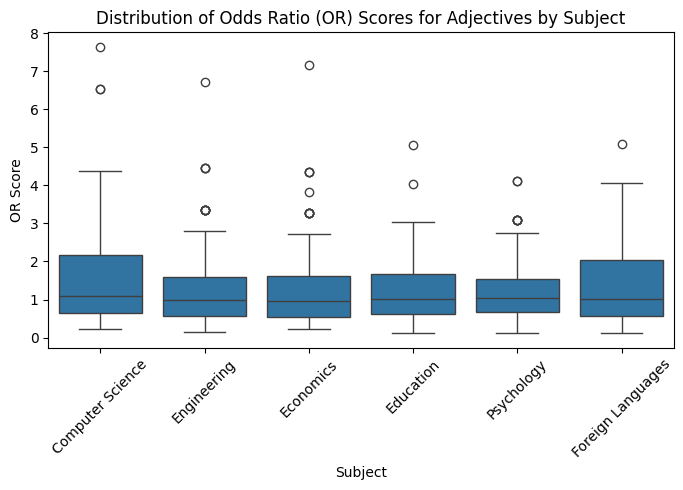

In [190]:
# Initialize a list to store the data for adjectives
data_adjectives = []

# Extract data from the provided dictionary structure focusing on adjectives
for group, words in odds_ratios_results_filter.items():
    parts = group.split('_')
    subject = '_'.join(parts[3:-1])  # Combine parts to form the subject
    if subject == "Computer_&_Information_Sciences":
        subject = 'Computer Science'
    elif subject == "Foreign_Languages_&_Literatures":
        subject ='Foreign Languages'
    word_type = parts[-1]  # This will be either 'Adjectives' or 'Nouns'
    
    # We only want to include adjectives in the analysis
    if word_type == 'Adjectives':
        for term, score in words.items():
            # Add the data to the list
            data_adjectives.append({
                'Subject': subject,
                'Term': term,
                'OR_Score': score
            })

# Convert the list of dictionaries to a DataFrame
df_adjectives = pd.DataFrame(data_adjectives)

# Sort the subjects according to the desired order
subject_order = ['Computer Science', 'Engineering', 'Economics',
                 'Education', 'Psychology', 'Foreign Languages']

# Ensure the 'Subject' column is categorical and ordered
df_adjectives['Subject'] = pd.Categorical(df_adjectives['Subject'], categories=subject_order, ordered=True)



# Create a distribution plot for OR scores by subject for adjectives only
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_adjectives, x='Subject', y='OR_Score')
plt.title('Distribution of Odds Ratio (OR) Scores for Adjectives by Subject')
plt.xlabel('Subject')
plt.ylabel('OR Score')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


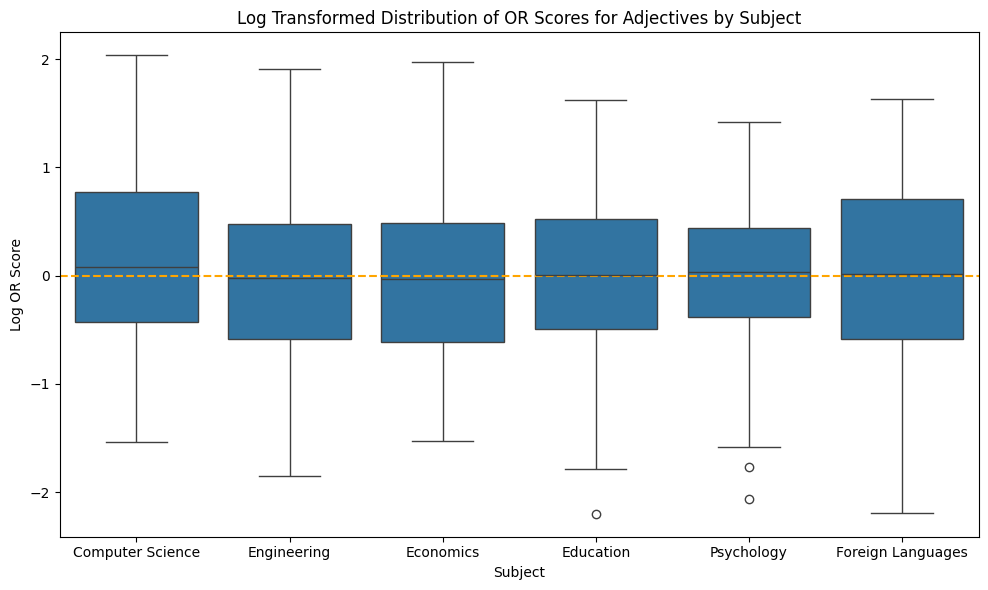

In [204]:

# Apply log transformation with a small constant to avoid log(0)
df_adjectives['Log_OR_Score'] = np.log(df_adjectives['OR_Score'])

# Update the plotting code to use 'Log_OR_Score'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_adjectives, x='Subject', y='Log_OR_Score', order=subject_order)
plt.title('Log Transformed Distribution of OR Scores for Adjectives by Subject')
plt.xlabel('Subject')
plt.ylabel('Log OR Score')

plt.axhline(y = 0, color='orange', linestyle = '--') 
plt.tight_layout()
plt.show()
